# Pymaceuticals Inc.
---
### Process Summary

Data Cleaning
-   The two files (mouse metadata & study results) were combined into one DataFrame for analysis.
-   Some preliminary analyses were conducted on the data, including:
    -   Checking the amount of mice
    -   Identifying any duplicate sets of data
    -   Creating a new DataFrame with the duplicate mouse removed
    -   Checking the amount of mice in the cleaned DataFrame

Summary Statistics
-   The cleaned DataFrame was grouped by the "Drug Regimen" and each set of tumor volumes for the drugs were analyzed, finding the:
    -   Mean
    -   Median
    -   Variance
    -   Standard deviation
    -   Standard error
-   These results were compiled into a new DataFrame with the index set as the drug regimens.

Bar and Pie Charts
-   Two bar plots (one using Pandas, one using PyPlot) were produced, showing the total number of observed timepoints for each drug regimen.
-   Two pie charts (one using Pandas, one using PyPlot) were produced, showing the distribution of female vs. male mice.

Quartiles, Outliers and Box Plot
-   A DataFrame was built to display each mouse's max time point value.
-   In assessing four of the treatment groups (Capomulin, Ramicane, Infubinol, Ceftamin), the following was conduced:
    -   Consolidated datasets were created for each of these drugs featuring mice on that regimen
    -   Tumor volumes for each drug were pulled from these datasets for analysis.
    -   For each drug regimen's tumor volume results, we calculated:
        -   The data quartiles
        -   The upper and lower quartiles
        -   The interquartile ranges
        -   The upper and lower bounds
        -   This information was printed in this section of the file as a summary.
    -   A box plot was created with the tumor volume values for each drug regimen.
    -   Finding outliers in the data
        -   Using the upper and lower bounds for each drug, the tumor volume lists were assessed to see if any values fell above the upper bound or below the lower bound. These boolean lists were then added to the consolidated datasets for each drug.
        -   These four consolidated datasets were assessed to see if there were any 'True' values from the upper and lower bound test above.

Line and Scatter Plots
-   A new DataFrame was created that displays all of the information for Capomulin-treated mice.
-   Line Plot:
    -   A single mouse from this list was selected and a line plot was created showing the tumor volume vs. the time point values.
-   Scatter Plot:
    -   The Capomulin-treated mice DataFrame was grouped by the Mouse ID and a mean tumor volume and weight was determined for each mouse.
    -   The tumor volume and weight values were placed into a scatter plot.

Correlation and Linear Regression
-   Regression variables including slope, intercept, r-value, p-value, standard error and the correlation coefficient were determined from the above average tumor volume and weight data for the Capomulin-treated mice.
-    A linear regression line was produced and added to the previous scatter plot.

### Analysis

-   When assessing all of the available drug regimens, it is clear that two drugs (Capomulin and Ramicane) feaured the lowest mean tumor volumes, variance and standard deviations. This shows that these two drugs produced similar and repeatable results in the tested mice, as opposed to seeing large fluctions in results. The information on the box plot for these drugs also shows that the max time point tumor volumes skew lower than the other drugs assessed. With all else equal, we can infer that Capomulin and Ramicane had a positive impact on the mice in their samples compared to the higher final time point tumor volumes for the other treatments.
-   Only one mouse out of the entire sample was flagged as an outlier based on the assessed data. This mouse was part of the group treated with Infubinol.
-   A strong positive correlation was found between mouse weight and average tumor volume. This makes sense when thinking about body proportions as size increases. For example, organs such as lungs will be larger in mice on the higher end of the weight scale, and tumor volumes can be larger than in smaller mice.
 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results_uncleaned = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_results_uncleaned.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_number = mouse_results_uncleaned["Mouse ID"].nunique()
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = mouse_results_uncleaned[mouse_results_uncleaned.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice["Mouse ID"].values

array(['g989', 'g989', 'g989', 'g989', 'g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
val_g989 = "g989"
mouse_g989_data = mouse_results_uncleaned.loc[mouse_results_uncleaned["Mouse ID"] == val_g989]
mouse_g989_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results_cleaned = mouse_results_uncleaned.loc[mouse_results_uncleaned["Mouse ID"] != val_g989]
mouse_results_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_number_cleaned = mouse_results_cleaned["Mouse ID"].nunique()
mice_number_cleaned

248

## Summary Statistics

In [7]:
# Pulling the list of drugs and removing duplicates to be able to set drug names as an index
drug_list_full = mouse_metadata.filter(["Drug Regimen"], axis=1)
drug_list_values = drug_list_full.drop_duplicates("Drug Regimen", keep='first')
drug_list_values = drug_list_values.sort_values("Drug Regimen", ascending=True)
drug_list = drug_list_values.set_index("Drug Regimen")
drug_list

""
Drug Regimen
Capomulin
Ceftamin
Infubinol
Ketapril
Naftisol
Placebo
Propriva
Ramicane
Stelasyn


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mouse_results_drug_group = mouse_results_cleaned.groupby("Drug Regimen")
tumor_volume = mouse_results_drug_group["Tumor Volume (mm3)"]

mean_tumor_vol = tumor_volume.mean()
median_tumor_vol = tumor_volume.median()
var_tumor_vol = tumor_volume.var()
stdev_tumor_vol = tumor_volume.std()
sem_tumor_vol = tumor_volume.sem()

# Assemble the resulting series into a single summary DataFrame.

tumor_volume_summary = drug_list.copy()
tumor_volume_summary["Mean Tumor Volume"] = mean_tumor_vol
tumor_volume_summary["Median Tumor Volume"] = median_tumor_vol
tumor_volume_summary["Tumor Volume Variance"] = var_tumor_vol
tumor_volume_summary["Tumor Volume Std. Dev"] = stdev_tumor_vol
tumor_volume_summary["Tumor Volume Std. Err"] = sem_tumor_vol

tumor_volume_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
timepoint_count = mouse_results_drug_group["Timepoint"].count()
timepoint_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<Axes: title={'center': 'Observed Mouse Timepoints per Drug'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

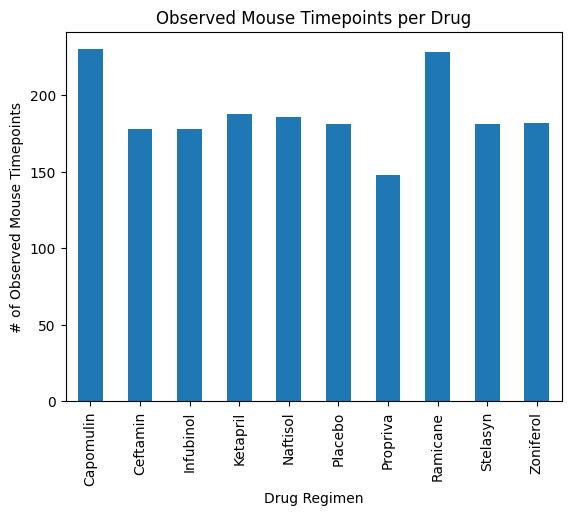

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_and_timepoint = drug_list.copy()
drug_and_timepoint["Timepoint Counts"] = timepoint_count
pandas_plot = drug_and_timepoint.plot.bar(x=None, y="Timepoint Counts", xlabel="Drug Regimen", 
                                          ylabel="# of Observed Mouse Timepoints", legend=None, 
                                          title="Observed Mouse Timepoints per Drug")
pandas_plot

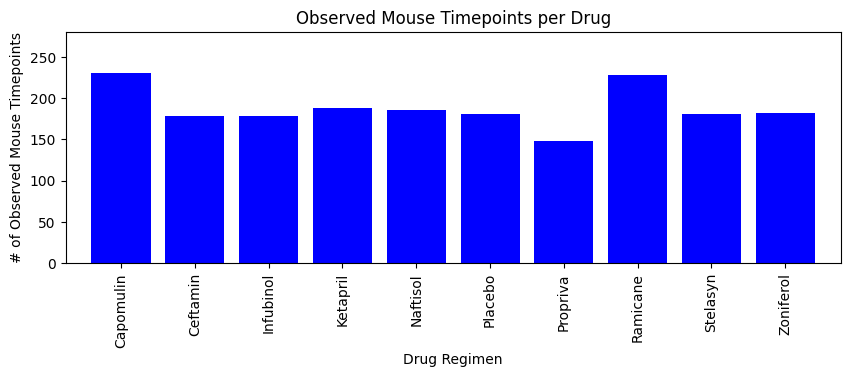

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_list_values["Drug Regimen"]
y_axis = timepoint_count

plt.figure(figsize=(10,3))
plt.bar(x_axis, y_axis, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+50)
plt.title("Observed Mouse Timepoints per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


In [12]:
# Created a new dataframe with unique mice and their gender
mouse_gender_list = mouse_results_cleaned.filter(["Mouse ID", "Sex"], axis=1)
mouse_gender_list = mouse_gender_list.drop_duplicates("Mouse ID", keep='first')
mouse_gender_list = mouse_gender_list.set_index("Mouse ID")
mouse_gender_list

,Sex
Mouse ID,
b128,Female
f932,Male
g107,Female
a457,Female
c819,Male
...,...
t565,Female
i557,Female
m957,Female


In [13]:
# Gender breakdown of the mice in the cleaned sample
mice_gender_count = mouse_gender_list["Sex"].value_counts()
mice_gender_count

Sex
Male      125
Female    123
Name: count, dtype: int64

<Axes: ylabel='Sex'>

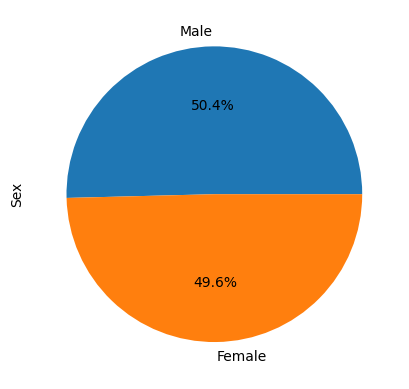

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_plot_pandas = mice_gender_count.plot.pie(ylabel="Sex", autopct="%1.1f%%")
gender_plot_pandas

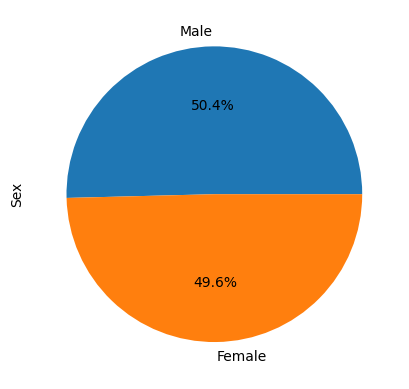

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Male", "Female"]
plt.pie(mice_gender_count, labels=sex, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Created a new DataFrame that displays each mouse's max timepoint value
mouse_results_cleaned
mouse_id_sort = mouse_results_cleaned.sort_values("Timepoint", ascending=False)
mouse_id_sort = mouse_id_sort.drop_duplicates("Mouse ID", keep='first')
mouse_id_sort

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1892,b879,45,72.555239,2,Stelasyn,Female,4,26
1795,s508,45,30.276232,0,Ramicane,Male,1,17
1797,y793,45,31.896238,2,Capomulin,Male,17,17
1798,c766,45,69.823146,4,Placebo,Female,13,26
1799,z578,45,30.638696,0,Ramicane,Male,11,16
...,...,...,...,...,...,...,...,...
194,b447,0,45.000000,0,Ceftamin,Male,2,30
222,t573,0,45.000000,0,Ceftamin,Female,15,27
155,l872,0,45.000000,0,Placebo,Male,19,30
135,d133,0,45.000000,0,Zoniferol,Male,5,30


In [17]:
# Put treatments into a list
drug_regimens_analyzed = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [18]:
# Sorting mouse data by drug regimen and saving the tumor volume results to a variable
mice_capomulin = mouse_id_sort[(mouse_id_sort["Drug Regimen"] == "Capomulin")]
mice_ramicane = mouse_id_sort[(mouse_id_sort["Drug Regimen"] == "Ramicane")]
mice_infubinol = mouse_id_sort[(mouse_id_sort["Drug Regimen"] == "Infubinol")]
mice_ceftamin = mouse_id_sort[(mouse_id_sort["Drug Regimen"] == "Ceftamin")]

tumor_volume_capomulin = mice_capomulin["Tumor Volume (mm3)"]
tumor_volume_ramicane = mice_ramicane["Tumor Volume (mm3)"]
tumor_volume_infubinol = mice_infubinol["Tumor Volume (mm3)"]
tumor_volume_ceftamin = mice_ceftamin["Tumor Volume (mm3)"]

In [19]:
# Generating the quartiles, and IQR for each treatment group
#Capomulin
quartiles_capomulin = tumor_volume_capomulin.quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin - lowerq_capomulin
lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)

#Ramicane
quartiles_ramicane = tumor_volume_ramicane.quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane - lowerq_ramicane
lower_bound_ramicane = lowerq_capomulin - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)

#Infubinol
quartiles_infubinol = tumor_volume_infubinol.quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol - lowerq_infubinol
lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)

#Ceftamin
quartiles_ceftamin = tumor_volume_ceftamin.quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin - lowerq_ceftamin
lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)

#Summary of Drug and Tumor Volume data
print("Capomulin Summary")
print(f"The lower quartile of Capomulin tumor volume is: {lowerq_capomulin}")
print(f"The upper quartile of Capomulin tumor volume is: {upperq_capomulin}")
print(f"The interquartile range of Capomulin tumor volume is: {iqr_capomulin}")
print(f"The median of Capomulin tumor volume is: {quartiles_capomulin[0.5]}")
print(f"Values below {lower_bound_capomulin} could be outliers")
print(f"Values above {upper_bound_capomulin} could be outliers")
print("-----------------------------------------------------------------------")
print("Ramicane Summary")
print(f"The lower quartile of Ramicane tumor volume is: {lowerq_ramicane}")
print(f"The upper quartile of Ramicane tumor volume is: {upperq_ramicane}")
print(f"The interquartile range of Ramicane tumor volume is: {iqr_ramicane}")
print(f"The median of Ramicane tumor volume is: {quartiles_ramicane[0.5]}")
print(f"Values below {lower_bound_ramicane} could be outliers")
print(f"Values above {upper_bound_ramicane} could be outliers")
print("-----------------------------------------------------------------------")
print("Infubinol Summary")
print(f"The lower quartile of Infubinol tumor volume is: {lowerq_infubinol}")
print(f"The upper quartile of Infubinol tumor volume is: {upperq_infubinol}")
print(f"The interquartile range of Infubinol tumor volume is: {iqr_infubinol}")
print(f"The median of Infubinol tumor volume is: {quartiles_infubinol[0.5]}")
print(f"Values below {lower_bound_infubinol} could be outliers")
print(f"Values above {upper_bound_infubinol} could be outliers")
print("-----------------------------------------------------------------------")
print("Ceftamin Summary")
print(f"The lower quartile of Ceftamin tumor volume is: {lowerq_ceftamin}")
print(f"The upper quartile of Ceftamin tumor volume is: {upperq_ceftamin}")
print(f"The interquartile range of Ceftamin tumor volume is: {iqr_ceftamin}")
print(f"The median of Ceftamin tumor volume is: {quartiles_ceftamin[0.5]}")
print(f"Values below {lower_bound_ceftamin} could be outliers")
print(f"Values above {upper_bound_ceftamin} could be outliers")
print("-----------------------------------------------------------------------")


Capomulin Summary
The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The median of Capomulin tumor volume is: 38.1251644
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers
-----------------------------------------------------------------------
Ramicane Summary
The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The median of Ramicane tumor volume is: 36.56165229
Values below 18.72955176 could be outliers
Values above 54.30681135 could be outliers
-----------------------------------------------------------------------
Infubinol Summary
The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquarti

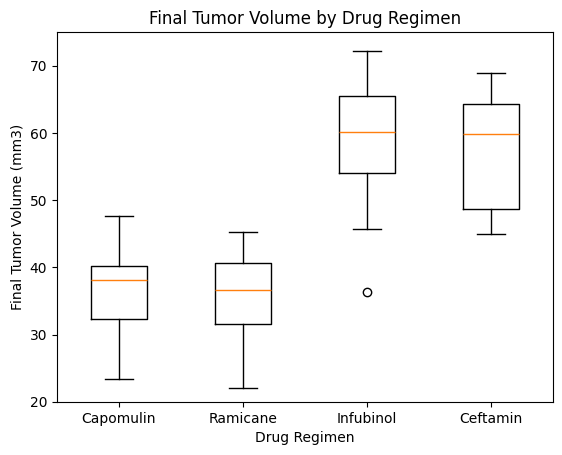

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
x_axis = np.arange(len(drug_regimens_analyzed)) +1

plt.boxplot([tumor_volume_capomulin, tumor_volume_ramicane, tumor_volume_infubinol, tumor_volume_ceftamin])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimens_analyzed)
plt.ylim(20,75)
plt.title("Final Tumor Volume by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

In [21]:
# Determine outliers using upper and lower bounds
outliers_capomulin_list = (tumor_volume_capomulin >= upper_bound_capomulin) | (tumor_volume_capomulin <= lower_bound_capomulin)
outliers_ramicane_list = (tumor_volume_ramicane >= upper_bound_ramicane) | (tumor_volume_ramicane <= lower_bound_ramicane)
outliers_infubinol_list = (tumor_volume_infubinol >= upper_bound_infubinol) | (tumor_volume_infubinol <= lower_bound_infubinol)
outliers_ceftamin_list = (tumor_volume_ceftamin >= upper_bound_ceftamin) | (tumor_volume_ceftamin <= lower_bound_ceftamin)

mice_capomulin_with_outliers = mice_capomulin.copy()
mice_ramicane_with_outliers = mice_ramicane.copy()
mice_infubinol_with_outliers = mice_infubinol.copy()
mice_ceftamin_with_outliers = mice_ceftamin.copy()

mice_capomulin_with_outliers["Outlier"] = outliers_capomulin_list
mice_ramicane_with_outliers["Outlier"] = outliers_ramicane_list
mice_infubinol_with_outliers["Outlier"] = outliers_infubinol_list
mice_ceftamin_with_outliers["Outlier"] = outliers_ceftamin_list

print(f"Potential outliers from each drug regimen (Empty DataFrame means there were no outliers)")
print(f"Capomulin: {mice_capomulin_with_outliers[(mice_capomulin_with_outliers['Outlier'] == True)]}")
print(f"Ramicane: {mice_ramicane_with_outliers[(mice_ramicane_with_outliers['Outlier'] == True)]}")
print(f"Infubinol: {mice_infubinol_with_outliers[(mice_infubinol_with_outliers['Outlier'] == True)]}")
print(f"Ceftamin: {mice_ceftamin_with_outliers[(mice_ceftamin_with_outliers['Outlier'] == True)]}")

Potential outliers from each drug regimen (Empty DataFrame means there were no outliers)
Capomulin: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g), Outlier]
Index: []
Ramicane: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g), Outlier]
Index: []
Infubinol:     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
420     c326          5           36.321346                 0    Infubinol   

        Sex  Age_months  Weight (g)  Outlier  
420  Female          18          25     True  
Ceftamin: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g), Outlier]
Index: []


## Line and Scatter Plots

In [22]:
# Finding a mouse treated with Capomulin
mouse_results_capomulin = mouse_results_cleaned.loc[mouse_results_cleaned["Drug Regimen"] == "Capomulin"]
mouse_results_capomulin = mouse_results_capomulin.sort_values("Mouse ID", ascending=True)
mouse_results_capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1051,y793,20,40.716428,2,Capomulin,Male,17,17
1564,y793,35,36.327870,2,Capomulin,Male,17,17
1292,y793,25,38.992734,2,Capomulin,Male,17,17
1797,y793,45,31.896238,2,Capomulin,Male,17,17


In [23]:
#Selected mouse "l509"
selected_mouse = mouse_results_capomulin.loc[mouse_results_capomulin["Mouse ID"] == "l509"]
selected_mouse = selected_mouse.sort_values("Timepoint", ascending=True)
selected_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


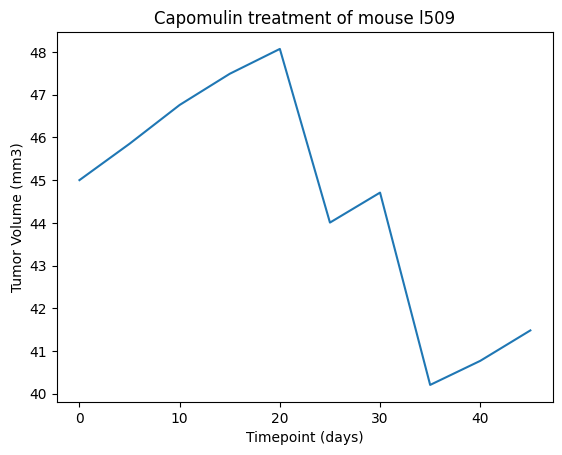

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(selected_mouse["Timepoint"], selected_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [25]:
mouse_results_capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1051,y793,20,40.716428,2,Capomulin,Male,17,17
1564,y793,35,36.327870,2,Capomulin,Male,17,17
1292,y793,25,38.992734,2,Capomulin,Male,17,17
1797,y793,45,31.896238,2,Capomulin,Male,17,17


In [26]:
# Scatter plot - generate the average tumor volume for each mouse
avg_mouse_tumor_vol = mouse_results_capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_mouse_tumor_vol.head()

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
Name: Tumor Volume (mm3), dtype: float64

In [27]:
# Pull the weight for each mouse
mouse_weight = mouse_results_capomulin.groupby("Mouse ID")["Weight (g)"].mean()
mouse_weight.head()

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
Name: Weight (g), dtype: float64

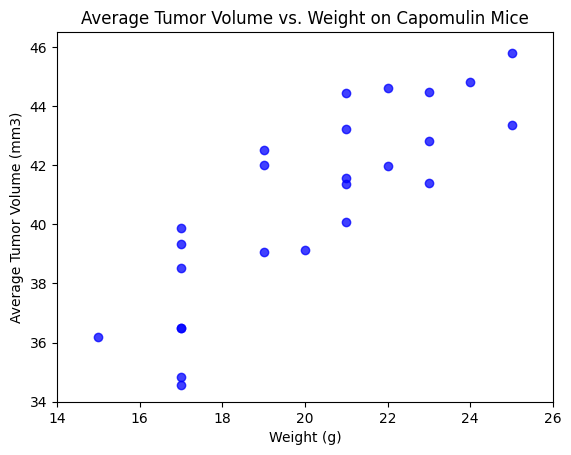

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(mouse_weight, avg_mouse_tumor_vol, marker="o", facecolors="blue", alpha=0.75)
plt.xlim(14,26)
plt.ylim(34,46.5)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight on Capomulin Mice")
plt.show()

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

x_values = mouse_weight
y_values = avg_mouse_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"rvalue: {rvalue}")
print(f"pvalue: {pvalue}")
print(f"stderr: {stderr}")

Slope: 0.954439689024105
Intercept: 21.552160532685004
rvalue: 0.8419363424694722
pvalue: 1.3225722434712285e-07
stderr: 0.12754359033201323


The correlation between mouse weight and average tumor volume is 0.84


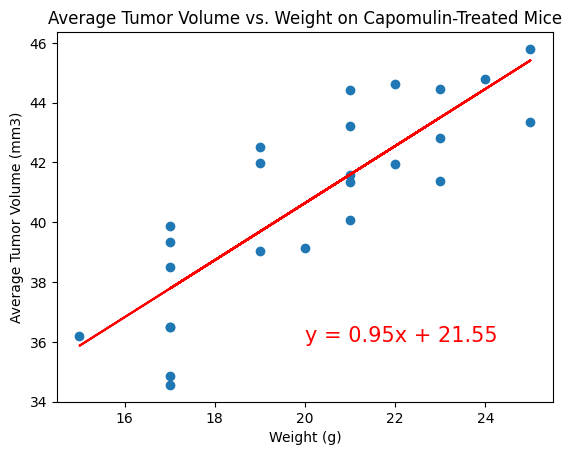

In [30]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,36), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight on Capomulin-Treated Mice")
plt.show()